In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

# Load data

In [28]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [29]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255;
X_test = X_test/255

In [30]:
print("Shape of the X_Train:",X_train.shape)
print("Shape of the Y_Train:",Y_train.shape)
print("Shape of the X_Test:",X_test.shape)
print("Shape of the Y_Test",Y_test.shape)


Shape of the X_Train: (400, 100, 100, 3)
Shape of the Y_Train: (400, 1)
Shape of the X_Test: (400, 100, 100, 3)
Shape of the Y_Test (400, 1)


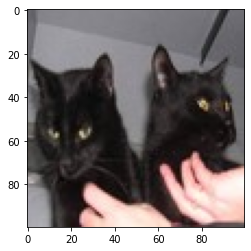

In [31]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model 

In [33]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation = 'sigmoid')
    
])

In [34]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [40]:
model.compile(loss ='binary_crossentropy',optimizer='adam',metrics =['accuracy'])
                                                                    

In [44]:
model.fit(X_train,Y_train,epochs=10,batch_size=64)

Epoch 1/10
7/7 [==============================] - 2s 292ms/step - loss: 0.4421 - accuracy: 0.8100
Epoch 2/10
7/7 [==============================] - 2s 293ms/step - loss: 0.3944 - accuracy: 0.8425
Epoch 3/10
7/7 [==============================] - 2s 303ms/step - loss: 0.3713 - accuracy: 0.8675
Epoch 4/10
7/7 [==============================] - 2s 299ms/step - loss: 0.3373 - accuracy: 0.8775
Epoch 5/10
7/7 [==============================] - 2s 292ms/step - loss: 0.2850 - accuracy: 0.9125
Epoch 6/10
7/7 [==============================] - 2s 295ms/step - loss: 0.2400 - accuracy: 0.9175
Epoch 7/10
7/7 [==============================] - 2s 301ms/step - loss: 0.2123 - accuracy: 0.9325
Epoch 8/10
7/7 [==============================] - 2s 293ms/step - loss: 0.1647 - accuracy: 0.9750
Epoch 9/10
7/7 [==============================] - 2s 291ms/step - loss: 0.1365 - accuracy: 0.9675
Epoch 10/10
7/7 [==============================] - 2s 306ms/step - loss: 0.1240 - accuracy: 0.9775


In [45]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 38ms/step - loss: 0.1183 - accuracy: 0.9775


[0.1182844266295433, 0.9775000214576721]

# Making Prediction

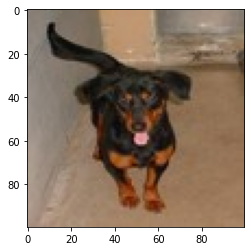

1/1 [==============================] - 0s 20ms/step
Our model says it is a : dog


In [60]:
indx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[indx2,:])
plt.show()

y_pred = model.predict(X_test[indx2,:].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :",pred)